In this notebook we test scipy.linalg.lu on different matrices including non-square and degenerate

scipy.linalg.lu returns 

$P$ permutation matrix,

$L$ lower-unitriangular matrix,

$U$ upper-triangular matrix

Applies partial pivoting to any input matrix

In [ ]:
import numpy as np
import scipy.linalg # SciPy Linear Algebra Library

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'

from scipy import linalg
from scipy import optimize
import sympy
from sympy import Matrix
import numpy as np

In [ ]:
sympy.init_printing()

In [ ]:
A = np.array([[0, 1, -1], [1, 1, 2], [3, -1, 1]]) # one pivotin at the 1-st step
# A = np.array([[0, 1, -1], [1, 1, 2]]) # rectangular is possible
# A = np.array([[0, 0, 0], [0, 0, 0]]) # non full rank is also possible

P, L, U = linalg.lu(A)
print("P:\n", P)
print("L:\n", L)
print("U:\n", U)
print("LU:\n", L @ U)
PLU = P @ L @ U
print("PLU:\n", PLU)
print("PLU==A:\n", PLU==A)

LU = L @ U
print("LU:\n", LU)
PA = P @ A
print("PA:\n", PA)
print("LU==PA:\n", LU==PA)

P:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L:
 [[1.         0.         0.        ]
 [0.33333333 1.         0.        ]
 [0.         0.75       1.        ]]
U:
 [[ 3.         -1.          1.        ]
 [ 0.          1.33333333  1.66666667]
 [ 0.          0.         -2.25      ]]
LU:
 [[ 3. -1.  1.]
 [ 1.  1.  2.]
 [ 0.  1. -1.]]
PLU:
 [[ 0.  1. -1.]
 [ 1.  1.  2.]
 [ 3. -1.  1.]]
PLU==A:
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
LU:
 [[ 3. -1.  1.]
 [ 1.  1.  2.]
 [ 0.  1. -1.]]
PA:
 [[ 3. -1.  1.]
 [ 1.  1.  2.]
 [ 0.  1. -1.]]
LU==PA:
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


Both these formulas produce a true answer since P is a swap of two rows and thus it is symmetric and self inverse.

In the following example P is not self inverse. In this case $A=PLU$ produces true and $PA=LU$ fails. The inverse of P equals its transpose, thus, $P^TA=LU$ is also true.

In [ ]:
# Here goes an example of a matrix with P not self-inverse
A = np.array([[1, 1, 2], [0, 1, -1],[3, -1, 1]])

P, L, U = linalg.lu(A)
print("P:\n", P)
print("L:\n", L)
print("U:\n", U)
PLU = P @ L @ U
# this works
print("PLU:\n", PLU)
print("PLU==A:\n", PLU==A)

LU = L @ U
print("LU:\n", LU)
PA = P @ A
# this fails
print("PA:\n", PA)
print("LU==PA:\n", LU==PA)

# the inverse of P equals its transpose
# the next should be Trye
Pinv = np.transpose(P)
PinvA = Pinv @ A
print("PinvA =", PinvA)
print("LU==PinvA:\n", LU==PinvA)

P:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L:
 [[1.         0.         0.        ]
 [0.33333333 1.         0.        ]
 [0.         0.75       1.        ]]
U:
 [[ 3.         -1.          1.        ]
 [ 0.          1.33333333  1.66666667]
 [ 0.          0.         -2.25      ]]
PLU:
 [[ 1.  1.  2.]
 [ 0.  1. -1.]
 [ 3. -1.  1.]]
PLU==A:
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
LU:
 [[ 3. -1.  1.]
 [ 1.  1.  2.]
 [ 0.  1. -1.]]
PA:
 [[ 0.  1. -1.]
 [ 3. -1.  1.]
 [ 1.  1.  2.]]
LU==PA:
 [[False False False]
 [False False False]
 [False  True False]]
PinvA = [[ 3. -1.  1.]
 [ 1.  1.  2.]
 [ 0.  1. -1.]]
LU==PinvA:
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [ ]:

A = scipy.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
P, L, U = scipy.linalg.lu(A)
P.dot(L.dot(U)) == L.dot(U)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Linear Algebra - Linear Equation Systems

$$
2 x_1 + 3 x_2 = 4
$$

$$
5 x_1 + 4 x_2 = 3
$$

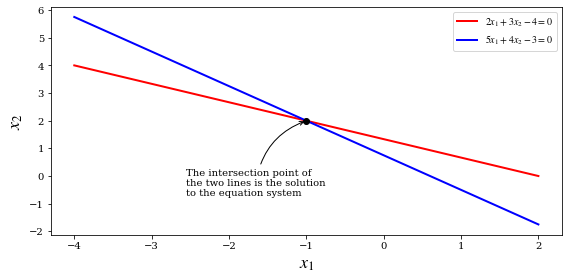

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 2, 100)

x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2-3=0$")

A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
x = linalg.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend();

fig.tight_layout()
fig.savefig('ch5-linear-systems-simple.pdf')

### Symbolic approach

In [ ]:
A = Matrix([[2, 3], [5, 4]])
b = Matrix([4, 3])

A.rank()

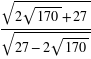

In [ ]:
A.condition_number()

In [ ]:
A.norm()

In [ ]:
L, U, P = A.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [ ]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [ ]:
A

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [ ]:
L * U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [ ]:
x = A.solve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [ ]:
A = Matrix ([[1, 2, 3], [4, 5, 6], [10, 11, 12]])# sympy matrix
A

⎡1   2   3 ⎤
⎢          ⎥
⎢4   5   6 ⎥
⎢          ⎥
⎣10  11  12⎦

In [ ]:
L, U, _ = A.LUdecomposition()
L

⎡1   0  0⎤
⎢        ⎥
⎢4   1  0⎥
⎢        ⎥
⎣10  3  1⎦

In [ ]:
U

⎡1  2   3 ⎤
⎢         ⎥
⎢0  -3  -6⎥
⎢         ⎥
⎣0  0   0 ⎦

In [ ]:
L * U

⎡1   2   3 ⎤
⎢          ⎥
⎢4   5   6 ⎥
⎢          ⎥
⎣10  11  12⎦

In [ ]:
U * L

⎡39   11   3 ⎤
⎢            ⎥
⎢-72  -21  -6⎥
⎢            ⎥
⎣ 0    0   0 ⎦

In [ ]:
L @ U

⎡1   2   3 ⎤
⎢          ⎥
⎢4   5   6 ⎥
⎢          ⎥
⎣10  11  12⎦

In [ ]:
A == L @ U

True

In [ ]:
A2 = Matrix ([[2, 4], [3, 5]])
A2

⎡2  4⎤
⎢    ⎥
⎣3  5⎦

In [ ]:
L2, U2, _ = A2.LUdecomposition()
L2, U2

⎛⎡ 1   0⎤  ⎡2  4 ⎤⎞
⎜⎢      ⎥, ⎢     ⎥⎟
⎝⎣3/2  1⎦  ⎣0  -1⎦⎠

In [ ]:
A2.inv()

⎡-5/2  2 ⎤
⎢        ⎥
⎣3/2   -1⎦

Summary

In [ ]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
P, L, U = linalg.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [ ]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [ ]:
P

array([[0., 1.],
       [1., 0.]])

In [ ]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [ ]:
linalg.solve(A, b)

array([-1.,  2.])

LU with sympy

LUdecompositiin() function in sympy does not permute rows of the given matrix unless the pivot is zero.

Prone to errors when pivot is small. See the examples below.

In [ ]:
A = sympy.Matrix([[0, 0, 2], [1, 3, 2], [1, 2, 3]])
L, U, P = A.LUdecomposition()
P

In [ ]:
# works for degenerate matrix
A = sympy.Matrix([[0, 0,], [1, 3]])
L, U, P = A.LUdecomposition()
print('L:\n', L)
print('U:\n', U)
print('P:\n', P)

L:
 Matrix([[1, 0], [0, 1]])
U:
 Matrix([[1, 3], [0, 0]])
P:
 [[0, 1]]


In [ ]:
# both wide and tall matrices also work
A = sympy.Matrix([[1, 2], [4, 5], [7, 9]])
L, U, P = A.LUdecomposition()
print('L:\n', L)
print('U:\n', U)
print('P:\n', P)

L:
 Matrix([[1, 0, 0], [4, 1, 0], [7, 5/3, 1]])
U:
 Matrix([[1, 2], [0, -3], [0, 0]])
P:
 []


In [ ]:
# problems with small pivot
eps = 10**(-18)
A = sympy.Matrix([[eps, 1], [1, 1]])
L, U, P = A.LUdecomposition()
print('L=\n', L)
print('U=\n', U)
print('P=\n', P)
LU = L@U
print('A=\n', A)
print('LU=\n', LU)
# the product LU is not equal to the original matrix A

L=
 Matrix([[1, 0], [1.00000000000000e+18, 1]])
U=
 Matrix([[1.00000000000000e-18, 1], [0, -1.00000000000000e+18]])
P=
 []
A=
 Matrix([[1.00000000000000e-18, 1], [1, 1]])
LU=
 Matrix([[1.00000000000000e-18, 1], [1.00000000000000, 0]])


In [ ]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
L, U, P = A.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [ ]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [ ]:
L * U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [ ]:
L @ U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [ ]:
x = A.solve(b); x # equivalent to A.LUsolve(b)

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [ ]:

A3 = sympy.Matrix([[1, 1, -2], [3, -1, 1], [0, 1, -1]])
A3

⎡1  1   -2⎤
⎢         ⎥
⎢3  -1  1 ⎥
⎢         ⎥
⎣0  1   -1⎦

In [ ]:
L3, U3, P3 = A3.LUdecomposition()
L3

⎡1   0    0⎤
⎢          ⎥
⎢3   1    0⎥
⎢          ⎥
⎣0  -1/4  1⎦

In [ ]:
U3

⎡1  1   -2 ⎤
⎢          ⎥
⎢0  -4   7 ⎥
⎢          ⎥
⎣0  0   3/4⎦

In [ ]:
P3

In [ ]:
L3.inv()

⎡ 1     0   0⎤
⎢            ⎥
⎢ -3    1   0⎥
⎢            ⎥
⎣-3/4  1/4  1⎦

In [ ]:
U3.inv()

⎡1  1/4   1/3⎤
⎢            ⎥
⎢0  -1/4  7/3⎥
⎢            ⎥
⎣0   0    4/3⎦

In [ ]:
A3.inv()

⎡0   1/3  1/3⎤
⎢            ⎥
⎢-1  1/3  7/3⎥
⎢            ⎥
⎣-1  1/3  4/3⎦

In [ ]:
myU3 = sympy.Matrix([[1,  1,  -2], [0,  1,  -7/4], [0,  0,  1]])
myU3

⎡1  1   -2  ⎤
⎢           ⎥
⎢0  1  -1.75⎥
⎢           ⎥
⎣0  0    1  ⎦

In [ ]:
myU3inv = myU3.inv()
myU3inv

⎡1  -1  0.25⎤
⎢           ⎥
⎢0  1   1.75⎥
⎢           ⎥
⎣0  0    1  ⎦

In [ ]:
myL3 = sympy.Matrix([[1,0, 0], [3/4, -1/4, 0], [-1, 1/3, 4/3]])
myL3 

⎡ 1            0                 0        ⎤
⎢                                         ⎥
⎢0.75        -0.25               0        ⎥
⎢                                         ⎥
⎣ -1   0.333333333333333  1.33333333333333⎦

In [ ]:
myL3inv = myL3.inv()
myL3inv

⎡ 1    0     0  ⎤
⎢               ⎥
⎢3.0  -4.0   0  ⎥
⎢               ⎥
⎣ 0   1.0   0.75⎦

In [ ]:
A3invByLU = myU3inv * myL3
A3invByLU

⎡ 0    0.333333333333333  0.333333333333333⎤
⎢                                          ⎥
⎢-1.0  0.333333333333333  2.33333333333333 ⎥
⎢                                          ⎥
⎣ -1   0.333333333333333  1.33333333333333 ⎦

In [ ]:
A3invDirectly = A3.inv()
A3invDirectly

⎡0   1/3  1/3⎤
⎢            ⎥
⎢-1  1/3  7/3⎥
⎢            ⎥
⎣-1  1/3  4/3⎦

In [ ]:
b3np = np.array([[-3], [4], [-1]])
b3np

array([[-3],
       [ 4],
       [-1]])

In [ ]:
A3np = np.array([[1, 1, -2], [3, -1, 1], [0, 1, -1]])
A3np

array([[ 1,  1, -2],
       [ 3, -1,  1],
       [ 0,  1, -1]])

In [ ]:
la.solve(A3np, b3np)

array([[1.],
       [2.],
       [3.]])

In [ ]:
x3 = A3invDirectly * b3np
x3

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [ ]:
# Or using LU:
x3byLU = myU3inv * myL3 * b3np
x3byLU

⎡1.0⎤
⎢   ⎥
⎢2.0⎥
⎢   ⎥
⎣3.0⎦